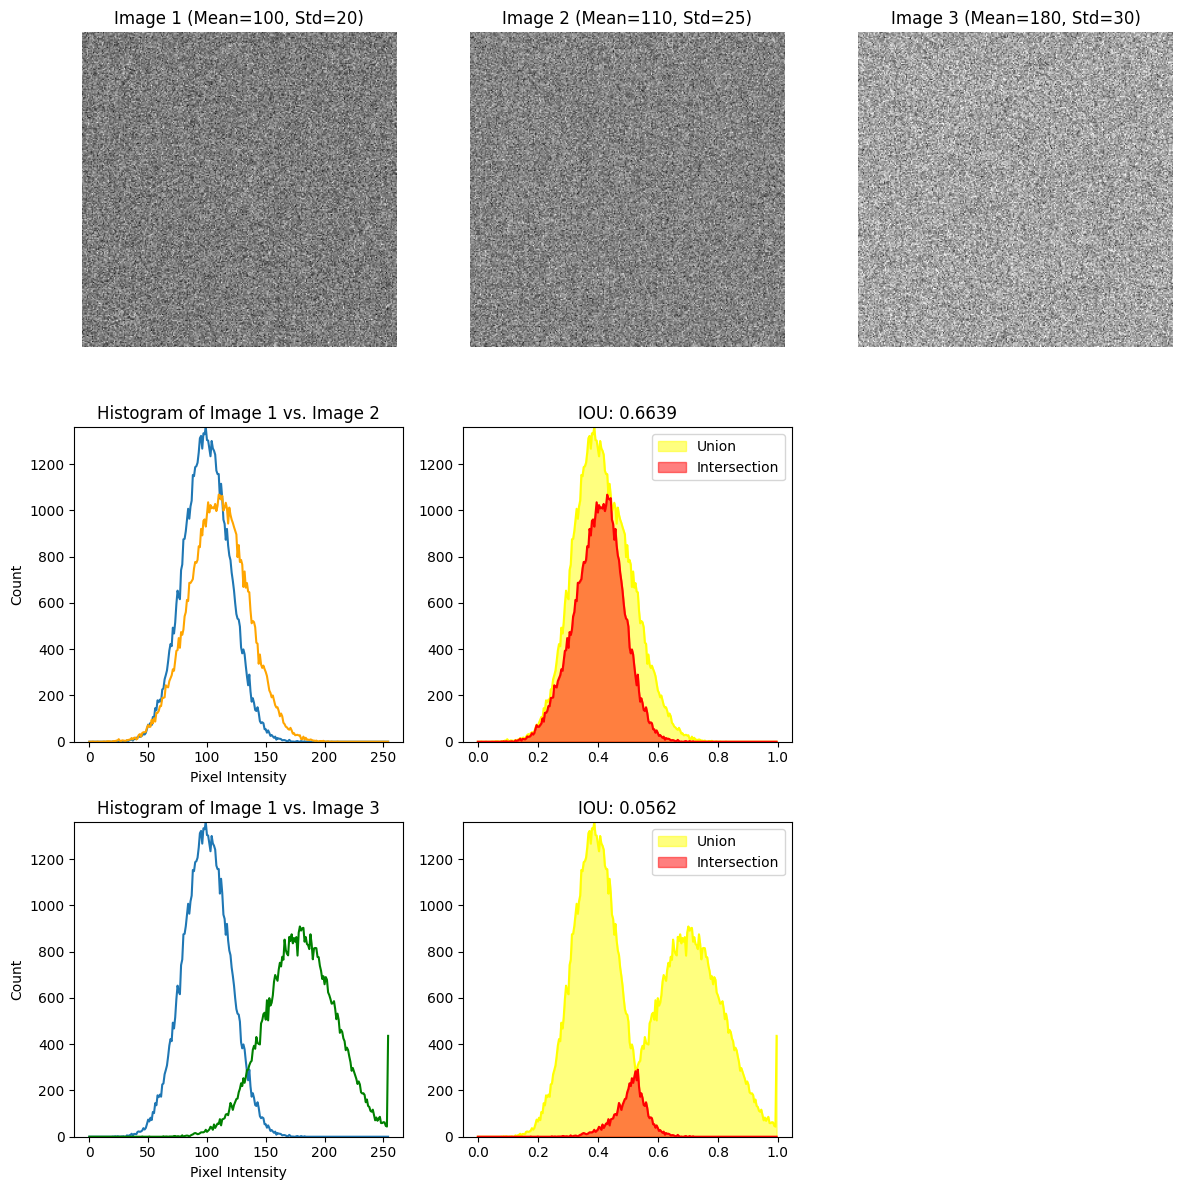

IOU between Image 1 and Image 2: 0.6639
IOU between Image 1 and Image 3: 0.0562


In [2]:
import numpy as np
import matplotlib.pyplot as plt

def iou_histogram(img1, img2, plt_idx):
    img1 = img1.copy()/255.
    img2 = img2.copy()/255.
    h1, bins1 = np.histogram(img1.flatten(), bins=255, range=(0., 1.), density=False)
    h2, bins2 = np.histogram(img2.flatten(), bins=255, range=(0., 1.), density=False)
    # print(bins1[:5])
    # print(bins2[:5])
    intersection = np.sum(np.minimum(h1, h2))
    union = np.maximum(h1, h2)
    plt.subplot(3, 3, plt_idx)
    plt.fill_between(bins1[:-1], union, color='yellow', alpha=0.5, label='Union')
    plt.plot(bins1[:-1], union, color='yellow')
    plt.fill_between(bins1[:-1], np.minimum(h1, h2), color='red', alpha=0.5, label='Intersection')
    plt.plot(bins1[:-1], np.minimum(h1, h2), color='red')
    plt.legend()
    union = np.sum(h1) + np.sum(h2) - intersection
    assert np.sum(h1) == np.sum(h2), f"h1 and h2 are not the same: {np.sum(h1)} != {np.sum(h2)}"
    plt.title(f"IOU: {intersection / union:.4f}")
    return intersection / union


import numpy as np
import matplotlib.pyplot as plt

# Function to generate an image with Gaussian noise
def generate_gaussian_image(mean, std, size=(256, 256)):
    """Generate an image with Gaussian noise."""
    return np.clip(np.random.normal(mean, std, size), 0, 255).astype(np.uint8)

# Generate three images
image1 = generate_gaussian_image(mean=100, std=20)  # Image 1: Gaussian (mean=100, std=20)
image2 = generate_gaussian_image(mean=110, std=25)  # Image 2: Gaussian (mean=110, std=25)
image3 = generate_gaussian_image(mean=180, std=30)  # Image 3: Gaussian (mean=180, std=30)

# Plot the images
plt.figure(figsize=(12, 12))
plt.subplot(3, 3, 1)
plt.imshow(image1, cmap='gray')
plt.title("Image 1 (Mean=100, Std=20)")
plt.axis('off')

plt.subplot(3, 3, 2)
plt.imshow(image2, cmap='gray')
plt.title("Image 2 (Mean=110, Std=25)")
plt.axis('off')

plt.subplot(3, 3, 3)
plt.imshow(image3, cmap='gray')
plt.title("Image 3 (Mean=180, Std=30)")
plt.axis('off')

# Plot the histograms
bins = np.linspace(0, 255, 256)
h1, _ = np.histogram(image1.flatten(), bins=bins, density=False)
h2, _ = np.histogram(image2.flatten(), bins=bins, density=False)
h3, _ = np.histogram(image3.flatten(), bins=bins, density=False)

plt.subplot(3, 3, 4)
plt.plot(bins[:-1], h1, label="Image 1")
plt.xlabel("Pixel Intensity")
plt.ylabel("Count")

plt.plot(bins[:-1], h2, label="Image 2", color='orange')
plt.title("Histogram of Image 1 vs. Image 2")
# plt.xlabel("Pixel Intensity")
# plt.ylabel("Count")
# get y_max
y_max = np.max(np.maximum(h1, h2))
y_min = np.min(np.minimum(h1, h2))
plt.ylim(y_min, y_max)

iou_12 = iou_histogram(image1, image2, 5)
plt.ylim(y_min, y_max)

plt.subplot(3, 3, 7)
plt.plot(bins[:-1], h1, label="Image 1")
plt.plot(bins[:-1], h3, label="Image 3", color='green')
plt.title("Histogram of Image 1 vs. Image 3")
plt.xlabel("Pixel Intensity")
plt.ylabel("Count")
y_max = np.max(np.maximum(h1, h3))
y_min = np.min(np.minimum(h1, h3))
plt.ylim(y_min, y_max)
iou_13 = iou_histogram(image1, image3, 8)
plt.ylim(y_min, y_max)

# Adjust layout and display
plt.tight_layout()
plt.show()


print(f"IOU between Image 1 and Image 2: {iou_12:.4f}")
print(f"IOU between Image 1 and Image 3: {iou_13:.4f}")
